<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_advanced_python_using_examples/blob/main/notebooks/OOPs/no_functions_linear_regression_hours_marks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_advanced_python_using_examples/blob/main/notebooks/OOPs/no_functions_linear_regression_hours_marks_1.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

In [17]:
# Generate some data
np.random.seed(42)
X = 2 * np.random.rand(25, 1)
y = 4 + 3 * X + np.random.randn(25, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Sklearn Linear Regression model
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_r2 = r2_score(y_test, sklearn_predictions)

print(f"Sklearn Model Coefficients: {sklearn_model.coef_}")
print(f"Sklearn Model Intercept: {sklearn_model.intercept_}")
print(f"Sklearn Model R-squared: {sklearn_r2}")

Sklearn Model Coefficients: [[3.57232712]]
Sklearn Model Intercept: [3.88892675]
Sklearn Model R-squared: 0.5922220720545246


In [19]:
# StatsModels Linear Regression model
X_train_b = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_b).fit()

X_test_b = sm.add_constant(X_test)
sm_predictions = sm_model.predict(X_test_b)
sm_r2 = r2_score(y_test, sm_predictions)

print(f"StatsModels Summary:\n{sm_model.summary()}")
print(f"StatsModels R-squared: {sm_r2}")

StatsModels Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     80.07
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           4.80e-08
Time:                        11:39:55   Log-Likelihood:                -27.584
No. Observations:                  20   AIC:                             59.17
Df Residuals:                      18   BIC:                             61.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8889      0.40

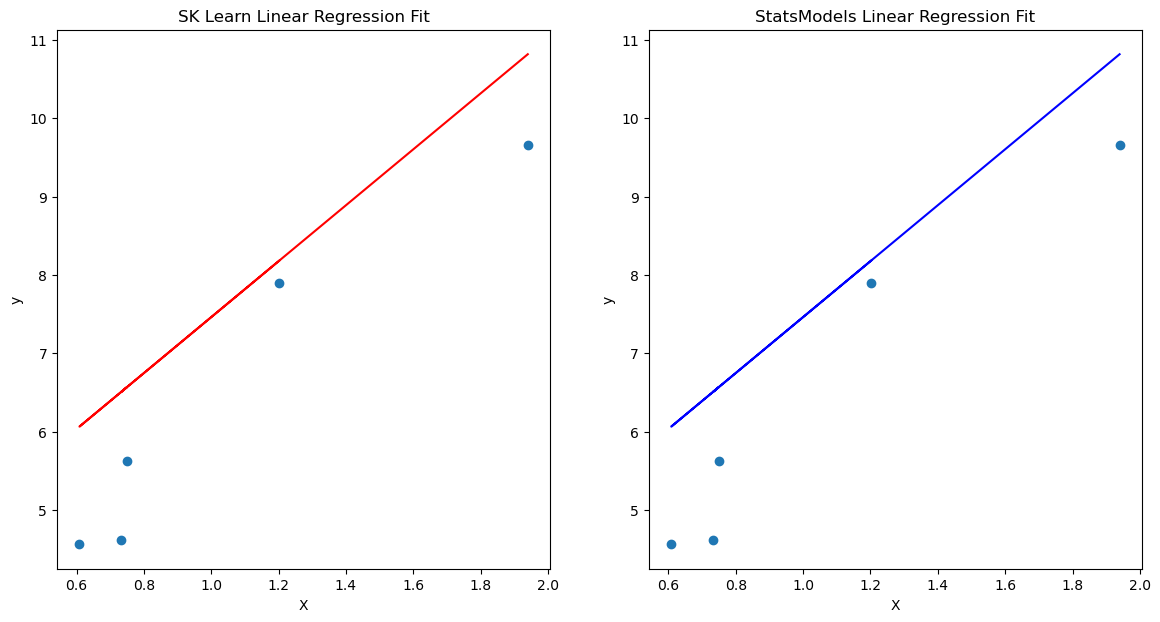

In [20]:
# Plot the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test)
plt.plot(X_test, sklearn_predictions, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("SK Learn Linear Regression Fit")

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test)
plt.plot(X_test, sm_predictions, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("StatsModels Linear Regression Fit")

plt.show()